In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt

Mounted at /content/drive


### Task 3



In [5]:
df = pd.read_csv('/content/drive/MyDrive/Forage- JP morgan/Task 3 and 4_Loan_Data.csv')
total_na = df.isna().sum().sum()
print(total_na, df.keys())

0 Index(['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default'],
      dtype='object')


In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["default"])
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(random_state=1, max_iter=100, alpha=0.01).fit(X_train_scaled, y_train)

clf.predict_proba(X_test_scaled[:1]), clf.score(X_test_scaled, y_test)

(array([[9.99999999e-01, 1.10923139e-09]]), 0.9976)

In [45]:
for i in clf.predict_proba(X_test)[:10]:
  print(i)

[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


###Task 4



(array([  3.,   1.,   8.,  20.,  33.,  64.,  97., 130., 212., 318., 442.,
        563., 732., 838., 888., 995., 981., 902., 723., 630., 503., 364.,
        222., 146.,  76.,  60.,  25.,  12.,  11.,   1.]),
 array([408.        , 422.73333333, 437.46666667, 452.2       ,
        466.93333333, 481.66666667, 496.4       , 511.13333333,
        525.86666667, 540.6       , 555.33333333, 570.06666667,
        584.8       , 599.53333333, 614.26666667, 629.        ,
        643.73333333, 658.46666667, 673.2       , 687.93333333,
        702.66666667, 717.4       , 732.13333333, 746.86666667,
        761.6       , 776.33333333, 791.06666667, 805.8       ,
        820.53333333, 835.26666667, 850.        ]),
 <BarContainer object of 30 artists>)

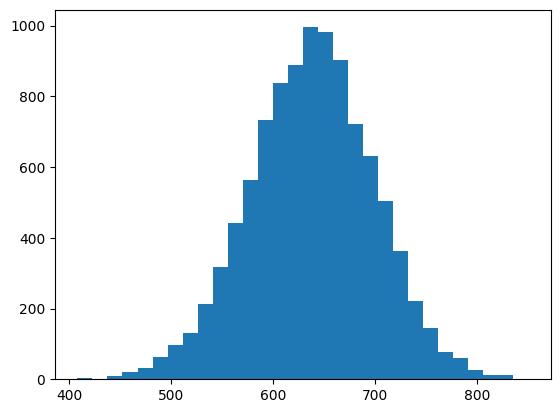

In [55]:
plt.hist(df['fico_score'], bins=30, label="Histogram")

In [66]:
import scipy.stats as stats
data = df['fico_score']
mu, sigma = np.mean(data), np.std(data)

In [65]:
num_bins = 10
percentiles = np.linspace(0, 100, num_bins + 1)
bin_edges = np.percentile(data, percentiles)
quantized_data = np.digitize(data, bin_edges, right=True)

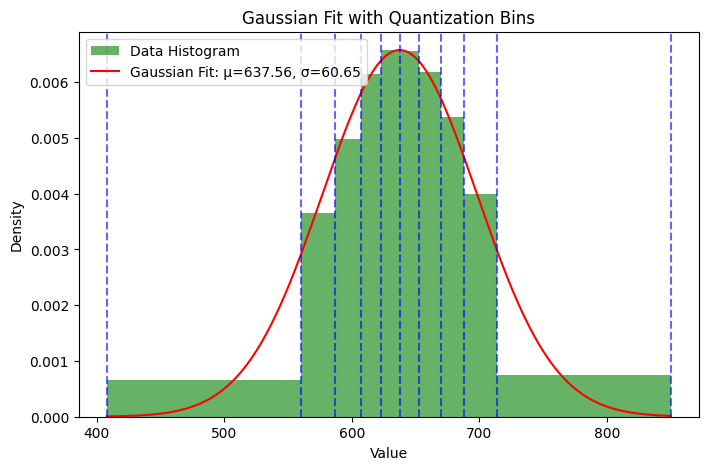

First 10 original values: 0    605
1    572
2    602
3    612
4    631
5    697
6    722
7    545
8    676
9    447
Name: fico_score, dtype: int64
First 10 quantized bin indices: [ 3  2  3  4  5  9 10  1  8  1]


In [63]:
x_vals = np.linspace(min(data), max(data), 1000)
pdf_vals = stats.norm.pdf(x_vals, mu, sigma)

plt.figure(figsize=(8, 5))
plt.hist(data, bins=bin_edges, density=True, alpha=0.6, color='g', label="Data Histogram")
plt.plot(x_vals, pdf_vals, 'r-', label=f"Gaussian Fit: μ={mu:.2f}, σ={sigma:.2f}")
for b in bin_edges:
    plt.axvline(b, color='b', linestyle="--", alpha=0.6)
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.title("Gaussian Fit with Quantization Bins")
plt.show()

print("First 10 original values:", data[:10])
print("First 10 quantized bin indices:", quantized_data[:10])